<a href="https://colab.research.google.com/github/HarshAade/04_bharat_internship/blob/main/Bharat_Intern_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 01 :- House Price Prediction

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
HouseDF = pd.read_csv('USA_Housing.csv')

In [ ]:
# first Five rows
HouseDF.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [ ]:
HouseDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [ ]:
HouseDF.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [ ]:
HouseDF.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

<Figure size 1200x1200 with 0 Axes>

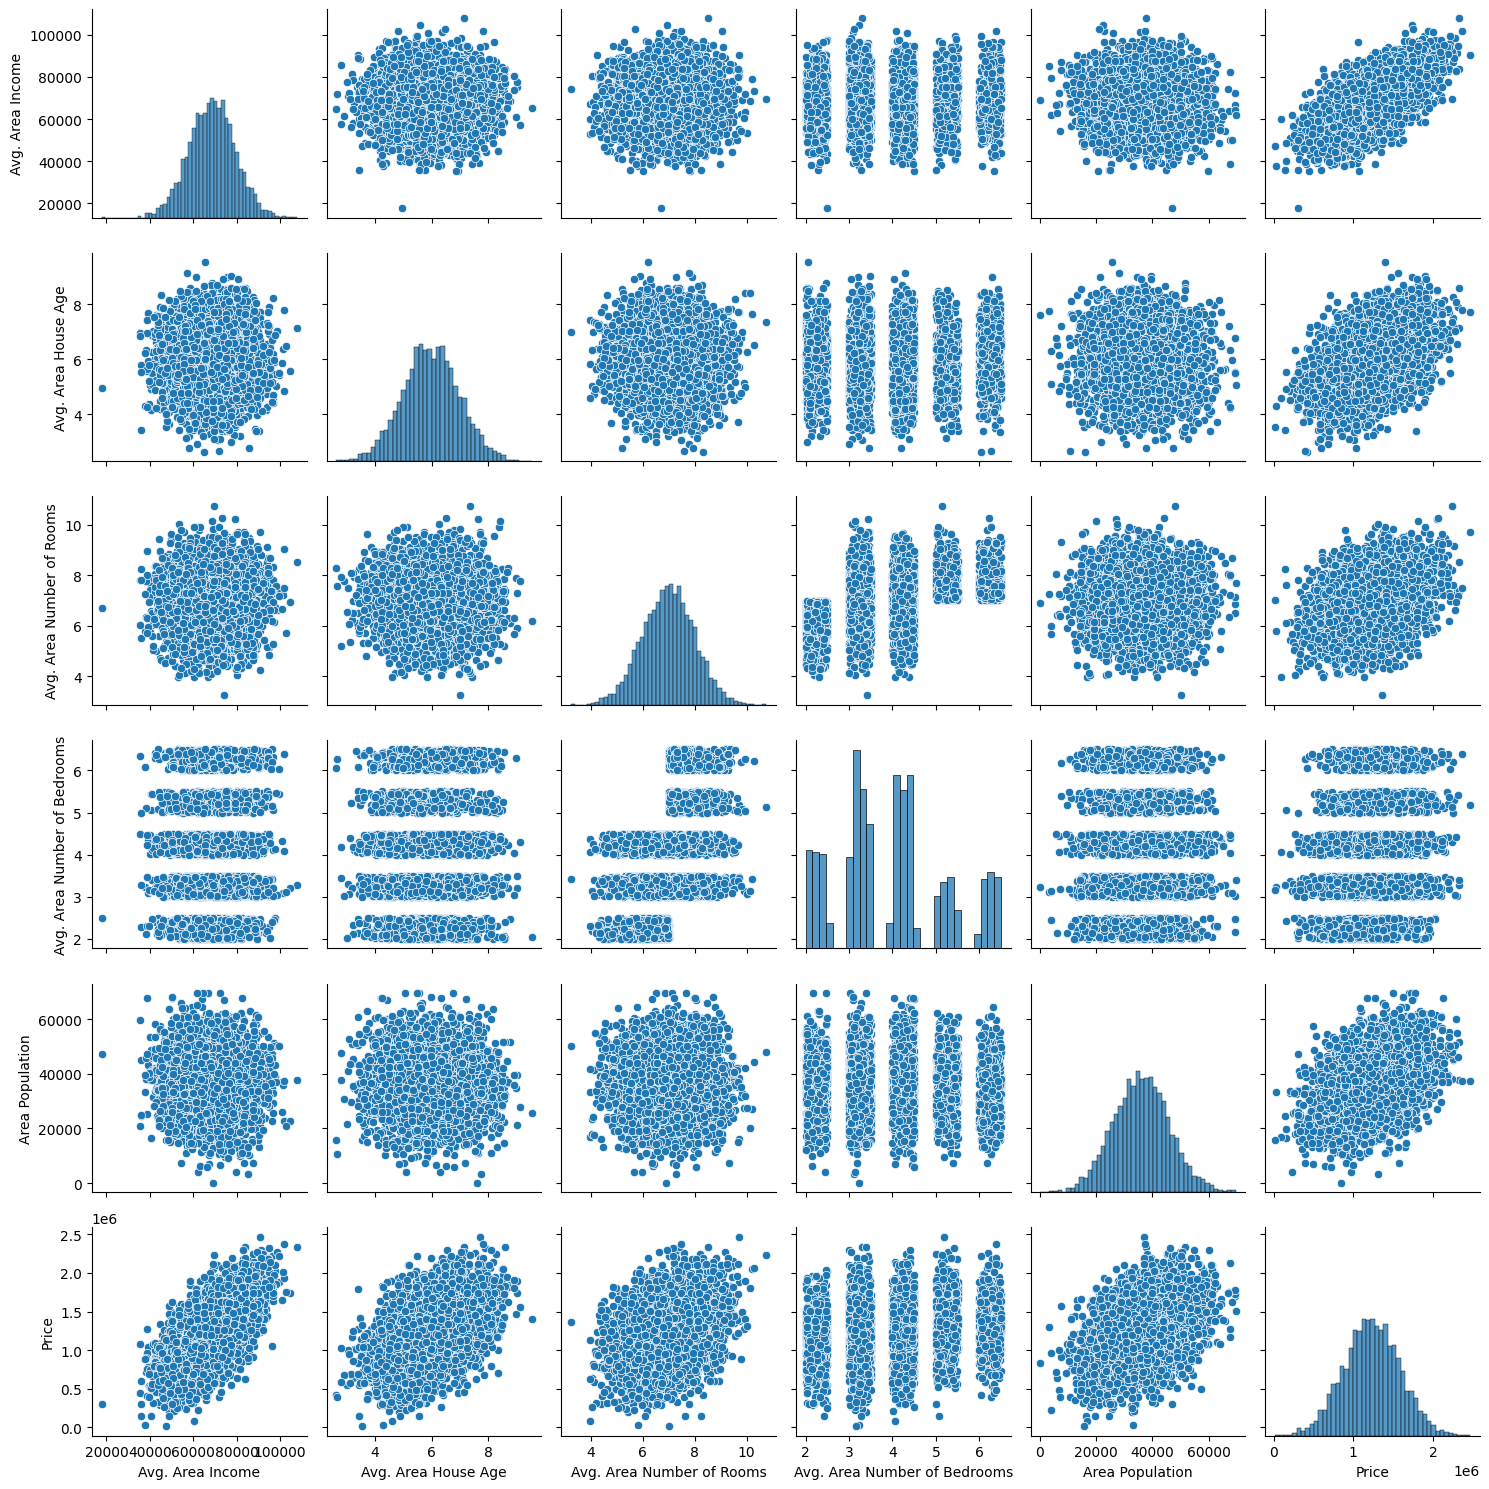

In [ ]:

# Set a larger figure size
plt.figure(figsize=(12, 12))  # Adjust the size as needed

# Create a pairplot with proper size and layout adjustments
sns.pairplot(HouseDF)
plt.tight_layout()  # This will help prevent plots from going out of the page

# Show the pairplot
plt.show()

<ipython-input-23-ab78e33f454c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(HouseDF.corr(),annot= True)


<Axes: >

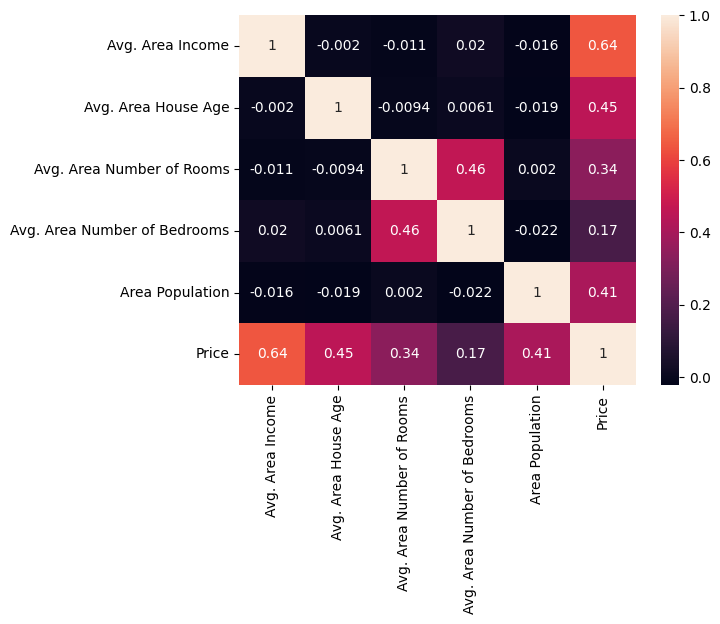

In [ ]:
sns.heatmap(HouseDF.corr(),annot= True)

In [ ]:
X = HouseDF[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]

y = HouseDF['Price']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train , X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lm = LinearRegression()

In [ ]:
lm.fit(X_train,y_train)

LinearRegression()

In [ ]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])

In [ ]:
coeff_df
# It Show that one unit incerases then area income will incerses 21.58$ will

,Coefficient
Avg. Area Income,21.589887
Avg. Area House Age,166102.501246
Avg. Area Number of Rooms,119895.936402
Avg. Area Number of Bedrooms,1901.071012
Area Population,15.231503


In [ ]:
prediction = lm.predict(X_test)

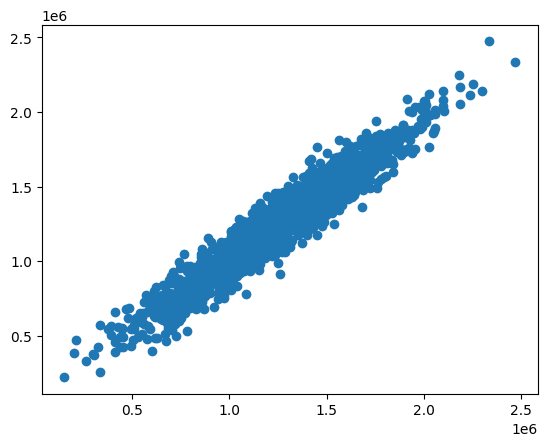

In [ ]:
plt.scatter(y_test,prediction)

<ipython-input-45-fef8fb9358b8>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-prediction),bins=50);


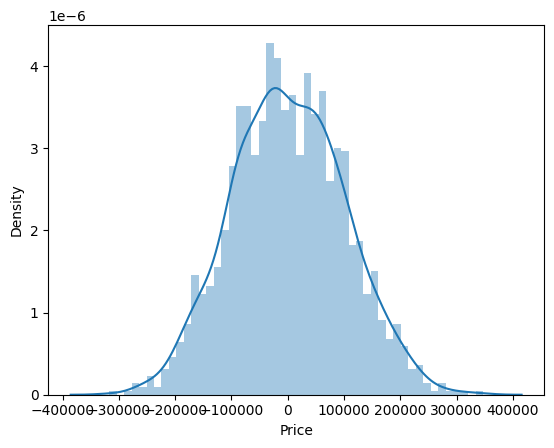

In [ ]:
sns.distplot((y_test-prediction),bins=50);

# Task 02 :- Red Wine Quality Prediction

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings
filterwarnings(action='ignore')

In [ ]:
wine = pd.read_csv('winequality-red.csv')

In [ ]:
# By using sample(25) it wil fetch any random 25 rows from the dataset
wine.sample(25)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1477,5.3,0.470,0.11,2.2,0.048,16.0,89.0,0.99182,3.54,0.88,13.60,7
1505,6.7,0.760,0.02,1.8,0.078,6.0,12.0,0.99600,3.55,0.63,9.95,3
482,10.6,0.360,0.59,2.2,0.152,6.0,18.0,0.99860,3.04,1.05,9.40,5
463,8.1,0.660,0.70,2.2,0.098,25.0,129.0,0.99720,3.08,0.53,9.00,5
1358,7.4,0.640,0.17,5.4,0.168,52.0,98.0,0.99736,3.28,0.50,9.50,5
429,12.8,0.840,0.63,2.4,0.088,13.0,35.0,0.99970,3.10,0.60,10.40,6
168,6.8,0.630,0.07,2.1,0.089,11.0,44.0,0.99530,3.47,0.55,10.40,6
174,7.3,0.380,0.21,2.0,0.080,7.0,35.0,0.99610,3.33,0.47,9.50,5
158,7.1,0.680,0.00,2.2,0.073,12.0,22.0,0.99690,3.48,0.50,9.30,5
1210,6.8,0.650,0.02,2.1,0.078,8.0,15.0,0.99498,3.35,0.62,10.40,6


In [ ]:
# Checking all the columns
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [ ]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
# As there is no null value
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
wine.groupby('quality').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


Data Analysis

fixed acidity              Axes(0.125,0.712609;0.168478x0.167391)
volatile acidity        Axes(0.327174,0.712609;0.168478x0.167391)
citric acid             Axes(0.529348,0.712609;0.168478x0.167391)
residual sugar          Axes(0.731522,0.712609;0.168478x0.167391)
chlorides                  Axes(0.125,0.511739;0.168478x0.167391)
free sulfur dioxide     Axes(0.327174,0.511739;0.168478x0.167391)
total sulfur dioxide    Axes(0.529348,0.511739;0.168478x0.167391)
density                 Axes(0.731522,0.511739;0.168478x0.167391)
pH                          Axes(0.125,0.31087;0.168478x0.167391)
sulphates                Axes(0.327174,0.31087;0.168478x0.167391)
alcohol                  Axes(0.529348,0.31087;0.168478x0.167391)
quality                  Axes(0.731522,0.31087;0.168478x0.167391)
dtype: object

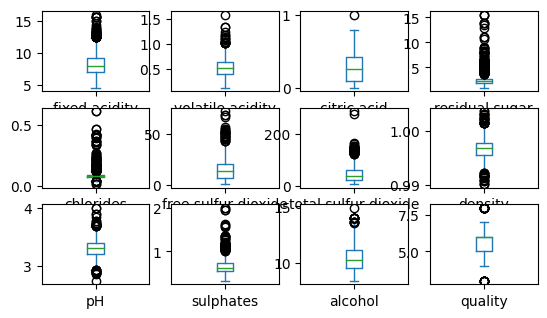

In [ ]:
wine.plot(kind='box',subplots = True,layout=(4,4),sharex = False)

<Axes: >

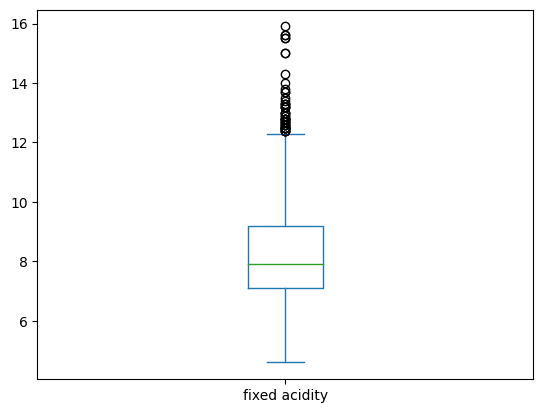

In [ ]:
wine['fixed acidity'].plot(kind='box')

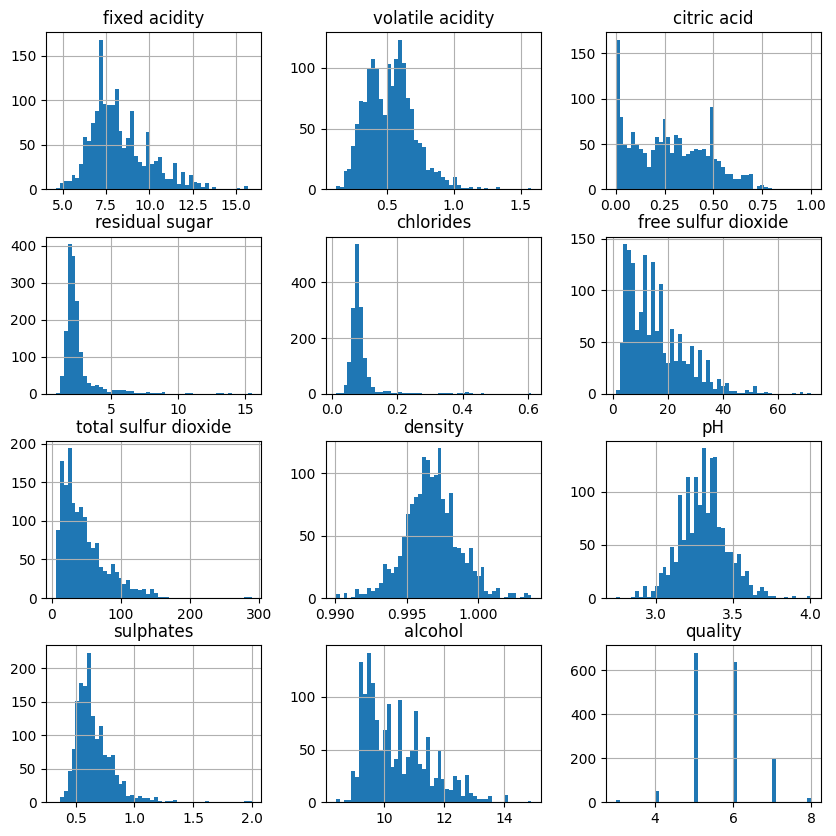

In [ ]:
wine.hist(figsize=(10,10),bins=50)
plt.show()

Feature selection

In [ ]:
wine.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
532,11.9,0.38,0.49,2.7,0.098,12.0,42.0,1.00040,3.16,0.61,10.3,5
85,6.9,0.55,0.15,2.2,0.076,19.0,40.0,0.99610,3.41,0.59,10.1,5
1015,10.5,0.39,0.46,2.2,0.075,14.0,27.0,0.99598,3.06,0.84,11.4,6
754,7.8,0.48,0.68,1.7,0.415,14.0,32.0,0.99656,3.09,1.06,9.1,6
657,12.0,0.50,0.59,1.4,0.073,23.0,42.0,0.99800,2.92,0.68,10.5,7


In [ ]:
wine['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [ ]:
# if wine quality is 7 or above then will consider as good quality wine
wine['goodquality'] = [1 if x >= 7 else 0 for x in wine['quality']]
wine.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,goodquality
1237,7.1,0.750,0.01,2.2,0.059,11.0,18.0,0.99242,3.39,0.40,12.8,6,0
380,8.3,0.260,0.42,2.0,0.080,11.0,27.0,0.99740,3.21,0.80,9.4,6,0
130,8.0,0.745,0.56,2.0,0.118,30.0,134.0,0.99680,3.24,0.66,9.4,5,0
625,6.8,0.690,0.00,5.6,0.124,21.0,58.0,0.99970,3.46,0.72,10.2,5,0
488,11.6,0.320,0.55,2.8,0.081,35.0,67.0,1.00020,3.32,0.92,10.8,7,1


In [ ]:
# separate depedent and indepented variables
X = wine.drop(['quality','goodquality'],axis=1)
Y = wine['goodquality']

In [ ]:
# see total number of good vs bad wines samples
# Goodquality = 1
# Badquality = 0
wine['goodquality'].value_counts()

0    1382
1     217
Name: goodquality, dtype: int64

In [ ]:
x

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,61287.067179,5.865890,8.512727,5.13,36882.159400
3,63345.240046,7.188236,5.586729,3.26,34310.242831
4,59982.197226,5.040555,7.839388,4.23,26354.109472
...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035
4996,78491.275435,6.999135,6.576763,4.02,25616.115489
4997,63390.686886,7.250591,4.805081,2.13,33266.145490
4998,68001.331235,5.534388,7.130144,5.44,42625.620156


In [ ]:
print(y)

0       1.059034e+06
1       1.505891e+06
2       1.058988e+06
3       1.260617e+06
4       6.309435e+05
            ...     
4995    1.060194e+06
4996    1.482618e+06
4997    1.030730e+06
4998    1.198657e+06
4999    1.298950e+06
Name: Price, Length: 5000, dtype: float64


Feature importance

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
classifiern = ExtraTreesClassifier()
classifiern.fit(X,Y)
score = classifiern.feature_importances_
print(score)

[0.07714282 0.10599813 0.09750499 0.07532696 0.0670747  0.07022551
 0.08140228 0.08828407 0.06510824 0.10767335 0.16425896]


Splitting Dataset

In [ ]:
from sklearn.model_selection import train_test_split

# Split your data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=7)


In [ ]:
model_res=pd.DataFrame(columns=['Model','Score'])

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score,confusion_matrix

model_res.loc[len(model_res)] = ['LogisticRegression',accuracy_score(Y_test,y_pred)]
model_res

,Model,Score
0,LogisticRegression,0.86875


Using KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Create and train a KNN classifier
model = KNeighborsClassifier(n_neighbors=3)  # You can adjust the number of neighbors as needed
model.fit(X_train, Y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

model_res.loc[len(model_res)] = ['KNeighborsClassifier',accuracy_score(Y_test,y_pred)]
model_res

,Model,Score
0,LogisticRegression,0.868750
1,KNeighborsClassifier,0.872917


Using SVC

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix


# Create and train an SVC classifier
model = SVC()  # You can choose the kernel type (linear, rbf, etc.)
model.fit(X_train, Y_train)

# Make predictions on the test data
Y_pred = model.predict(X_test)

model_res.loc[len(model_res)] = ['SVC',accuracy_score(Y_test,y_pred)]
model_res

,Model,Score
0,LogisticRegression,0.868750
1,KNeighborsClassifier,0.872917
2,SVC,0.872917


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix


# Create and train a Decision Tree classifier
model = DecisionTreeClassifier(criterion='entropy',random_state=7)  # You can specify hyperparameters hereymodel.fit(X_train, Y_train)
model.fit(X_train, Y_train)
# Make predictions on the test data
y_pred = model.predict(X_test)


model_res.loc[len(model_res)] = ['DecisionTreeClassifier',accuracy_score(Y_test,y_pred)]
model_res

,Model,Score
0,LogisticRegression,0.868750
1,KNeighborsClassifier,0.872917
2,SVC,0.872917
3,DecisionTreeClassifier,0.864583


GaussianNB

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix


# Create and train a Gaussian Naive Bayes classifier
model3= GaussianNB()
model3.fit(X_train, Y_train)

# Make predictions on the test data
Y_pred = model3.predict(X_test)

model_res.loc[len(model_res)] = ['GaussianNB',accuracy_score(Y_test,y_pred)]
model_res

,Model,Score
0,LogisticRegression,0.868750
1,KNeighborsClassifier,0.872917
2,SVC,0.872917
3,DecisionTreeClassifier,0.864583
4,GaussianNB,0.864583


Random forest


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Create and train a Random Forest classifier
model2 = RandomForestClassifier(random_state=1)  # You can specify hyperparameters here
model2.fit(X_train, Y_train)

# Make predictions on the test data
Y_pred = model2.predict(X_test)

model_res.loc[len(model_res)] = ['RandomForestClassifier',accuracy_score(Y_test,y_pred)]
model_res

,Model,Score
0,LogisticRegression,0.868750
1,KNeighborsClassifier,0.872917
2,SVC,0.872917
3,DecisionTreeClassifier,0.864583
4,GaussianNB,0.864583
5,RandomForestClassifier,0.864583


In [ ]:
model_res = model_res.sort_values(by='Score',ascending=False)
model_res

,Model,Score
1,KNeighborsClassifier,0.872917
2,SVC,0.872917
0,LogisticRegression,0.868750
3,DecisionTreeClassifier,0.864583
4,GaussianNB,0.864583
5,RandomForestClassifier,0.864583
